In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data ingestion

df = pd.read_csv('/content/Travel.csv')


In [ ]:
# now let's start with eda

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.shape

(4888, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df.dtypes

,0
CustomerID,int64
ProdTaken,int64
Age,float64
TypeofContact,object
CityTier,int64
DurationOfPitch,float64
Occupation,object
Gender,object
NumberOfPersonVisiting,int64
NumberOfFollowups,float64


In [ ]:
# let's look to column one by one and see all the unique values, starting with gender

df['Gender'].dtypes

dtype('O')

In [ ]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [4]:
df['Gender'].replace(to_replace = 'Fe Male', value = 'Female', inplace = True)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
# let us check all the unique values for each column using loop

cols = df.columns

In [8]:
cols

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
for col in cols:
  print(f"{col} has {df[col].unique()} values and datatype is {df[col].dtypes}\n ")


CustomerID has [200000 200001 200002 ... 204885 204886 204887] values and datatype is int64
 
ProdTaken has [1 0] values and datatype is int64
 
Age has [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.] values and datatype is float64
 
TypeofContact has ['Self Enquiry' 'Company Invited' nan] values and datatype is object
 
CityTier has [3 1 2] values and datatype is int64
 
DurationOfPitch has [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.] values and datatype is float64
 
Occupation has ['Salaried' 'Free Lancer' 'Small Business' 'Large Business'] values and datatype is object
 
Gender has ['Female' 'Male'] values and datatype is object
 
NumberOfPersonVisiting has [3 2 1 4 5] values and datatype is int64
 
NumberOfFollowups 

In [ ]:
len(df.index)

4888

In [10]:
# now let us deal with null values

df.isnull().sum().sort_values(ascending = False)

,0
DurationOfPitch,251
MonthlyIncome,233
Age,226
NumberOfTrips,140
NumberOfChildrenVisiting,66
NumberOfFollowups,45
PreferredPropertyStar,26
TypeofContact,25
Designation,0
OwnCar,0


In [11]:
round(df.isnull().sum() / len(df.index)*100, 2 ).sort_values(ascending = False)

,0
DurationOfPitch,5.14
MonthlyIncome,4.77
Age,4.62
NumberOfTrips,2.86
NumberOfChildrenVisiting,1.35
NumberOfFollowups,0.92
PreferredPropertyStar,0.53
TypeofContact,0.51
Designation,0.00
OwnCar,0.00


In [ ]:
# now, if the number of null will be more we will replace it otherwise we will drop

In [12]:
# dropping null value

df.dropna(axis = 0, inplace = True)

In [ ]:
df.shape

(4128, 20)

In [13]:
# now since all the columns are numeric in datatypes but we someof the column are categorical in nature but mapped with numeric value
# so i've seperated the columns in cats and nums

cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [ ]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [ ]:
nums

['CustomerID',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

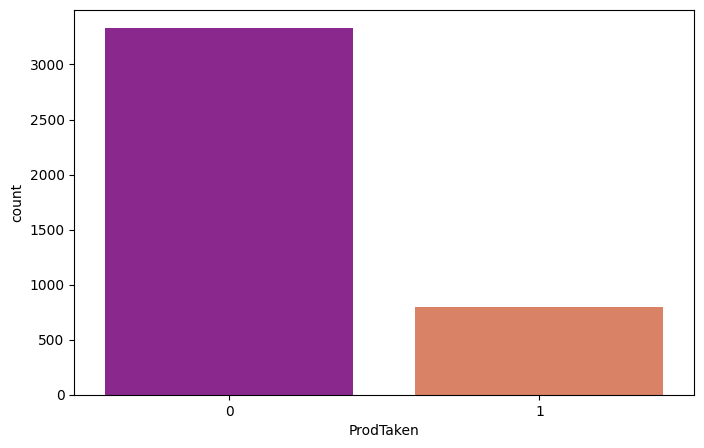

In [14]:
#Univariate Analysis for Categorical Columns

plt.figure(figsize = (8,5))
sns.countplot(x = 'ProdTaken', data = df, palette = 'plasma')
plt.show()

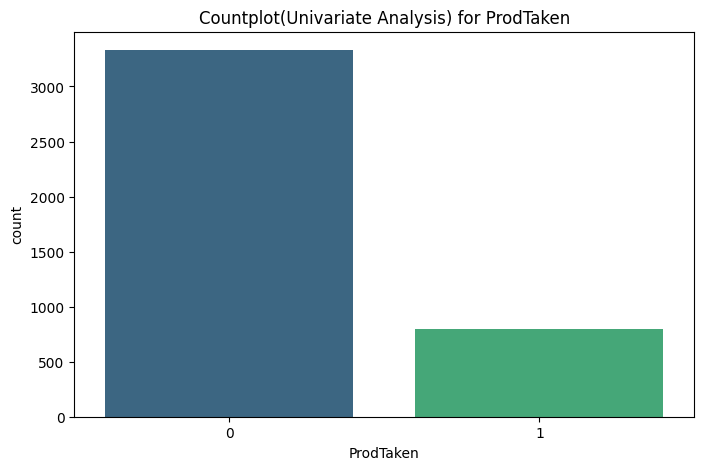

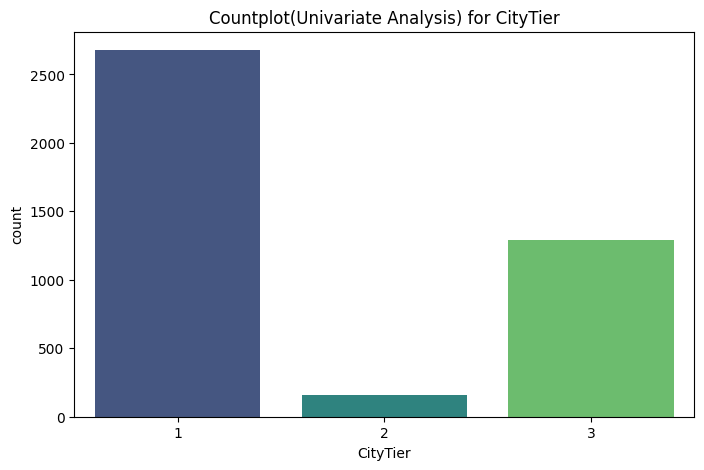

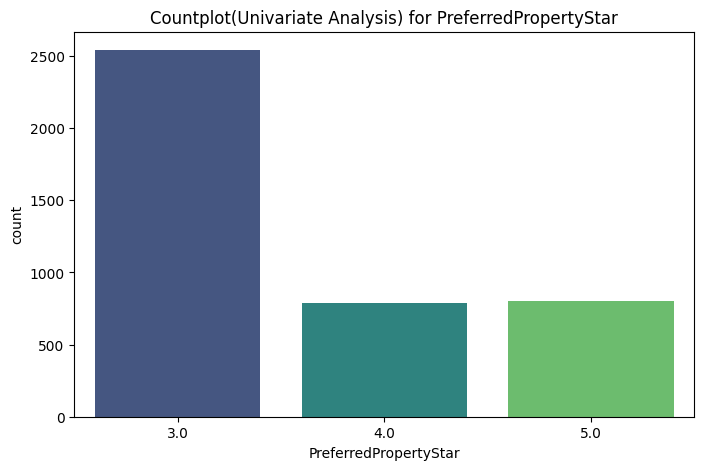

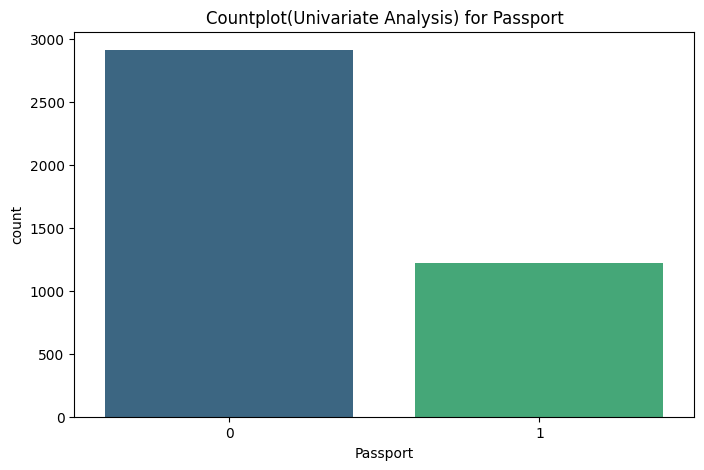

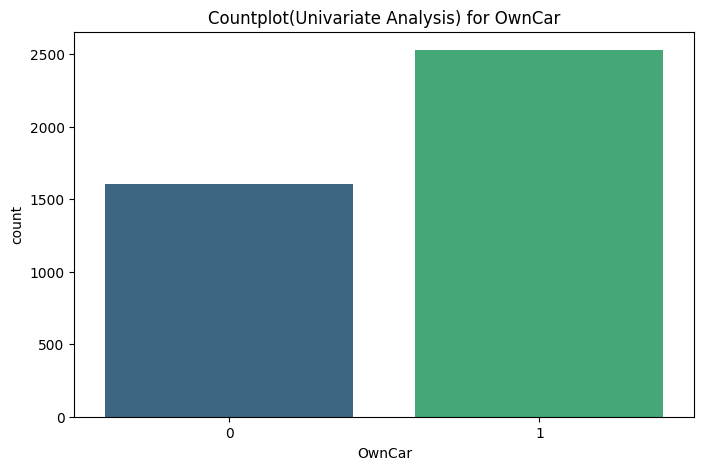

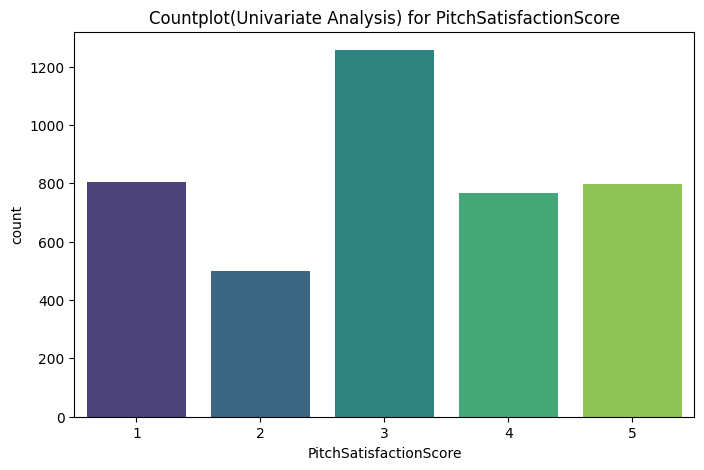

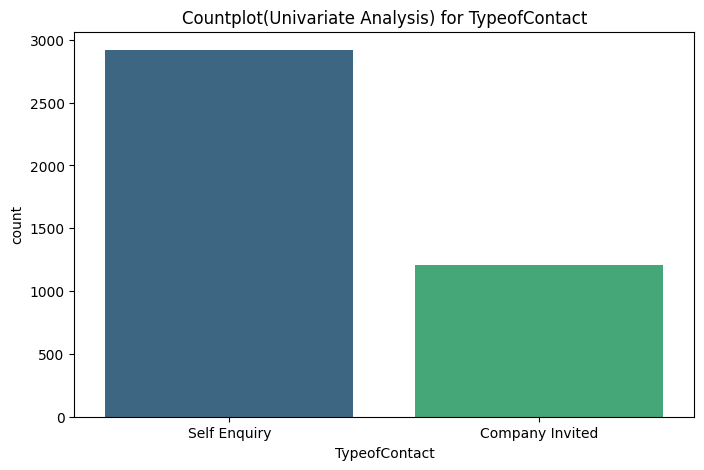

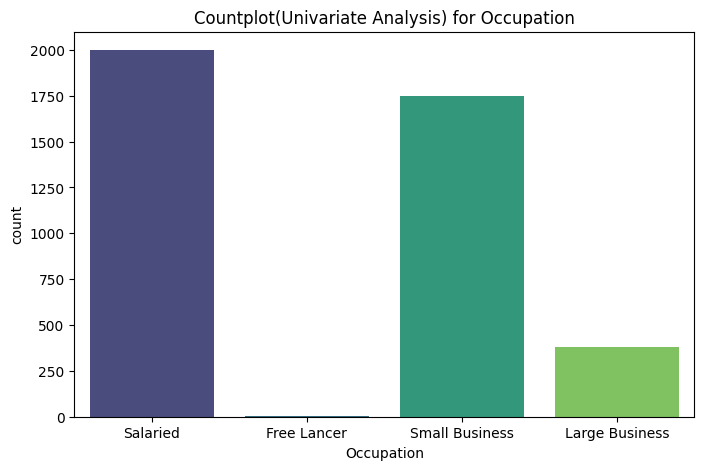

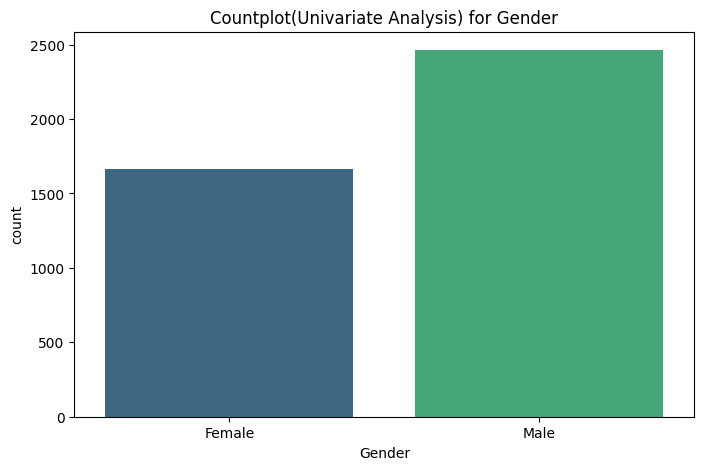

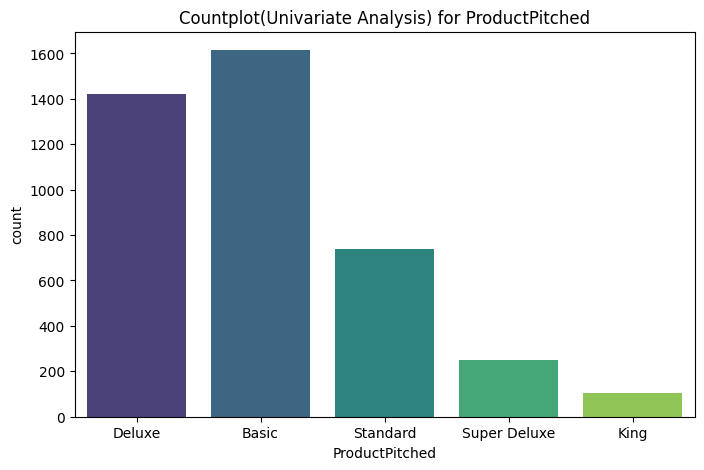

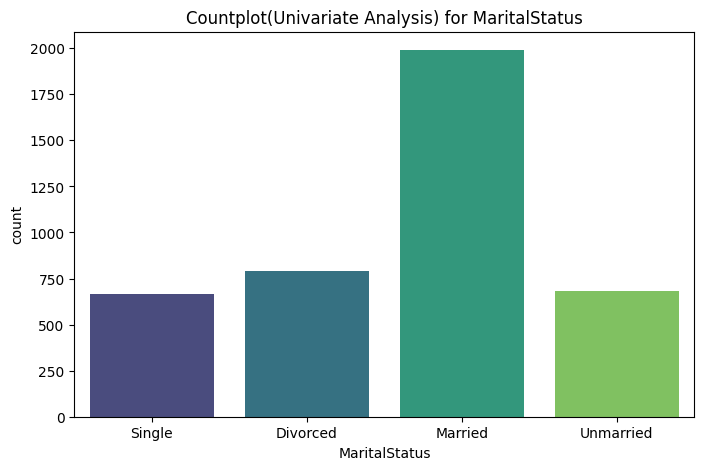

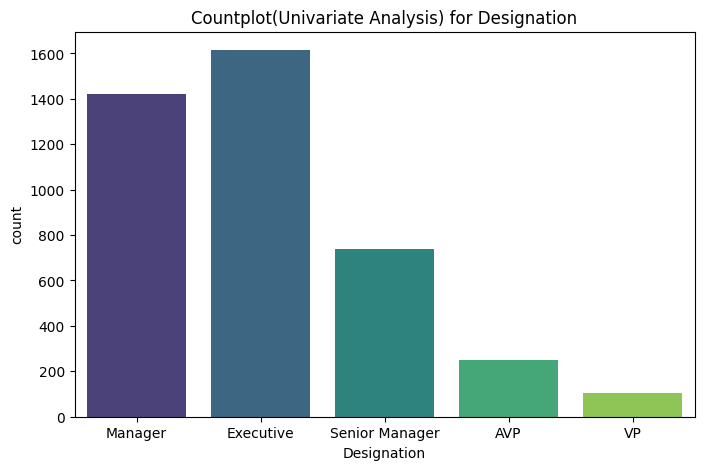

In [16]:
# now i want to plot the countplot for each column for doing the univariate analysis
# now either one by one plot or using for loop


for cat_column in cats:
  plt.figure(figsize = (8,5))
  sns.countplot(x = cat_column, data = df, palette = 'viridis')
  plt.title(f'Countplot(Univariate Analysis) for {cat_column}')
  plt.show()

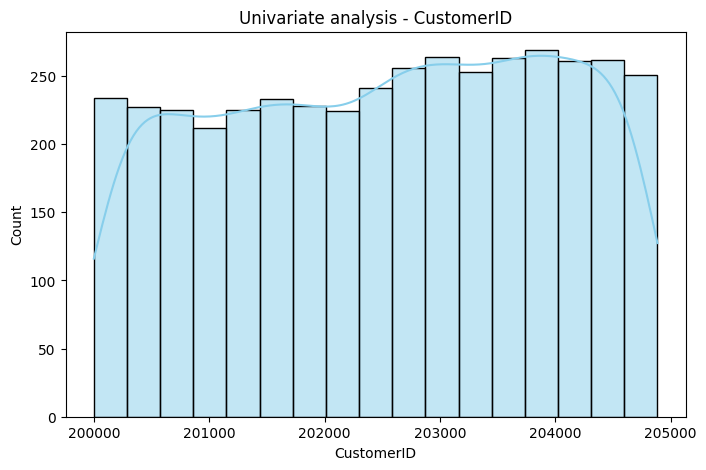

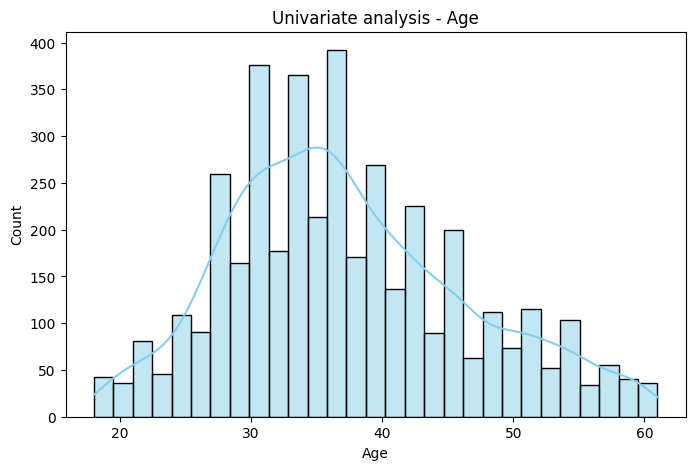

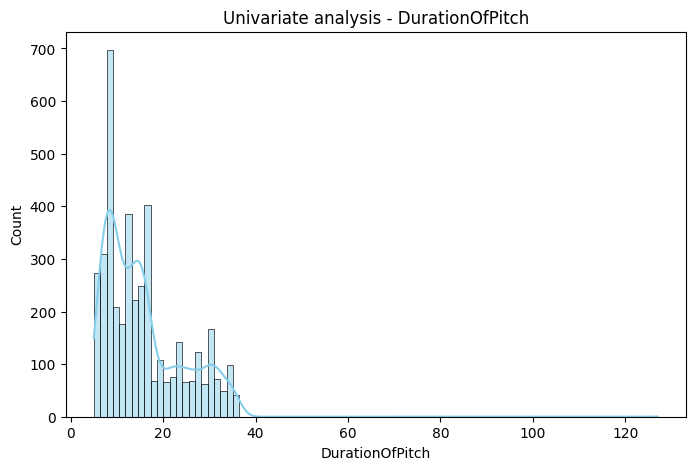

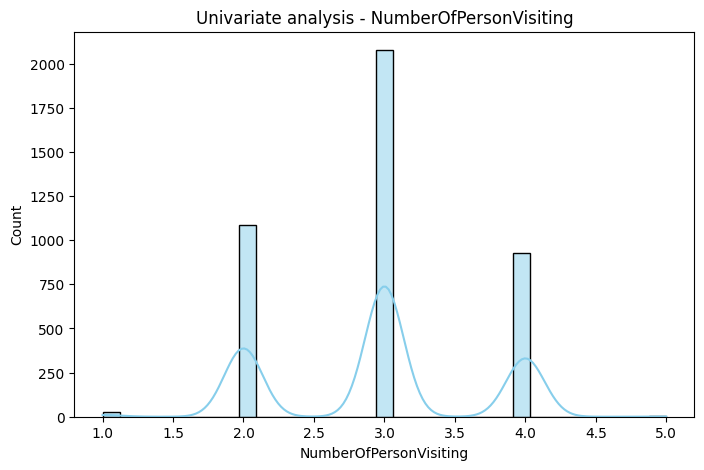

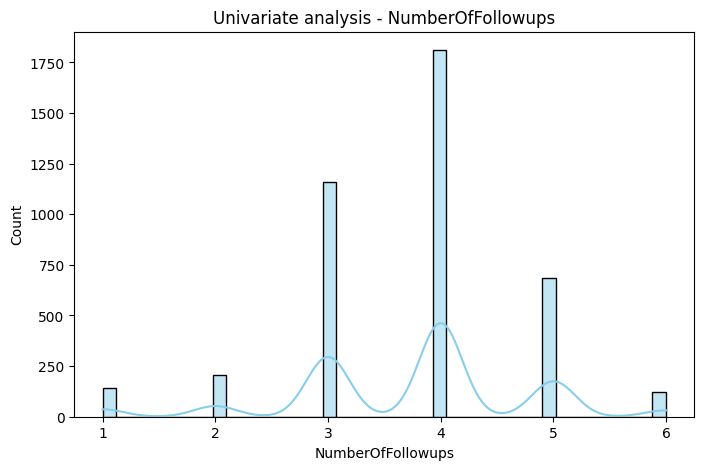

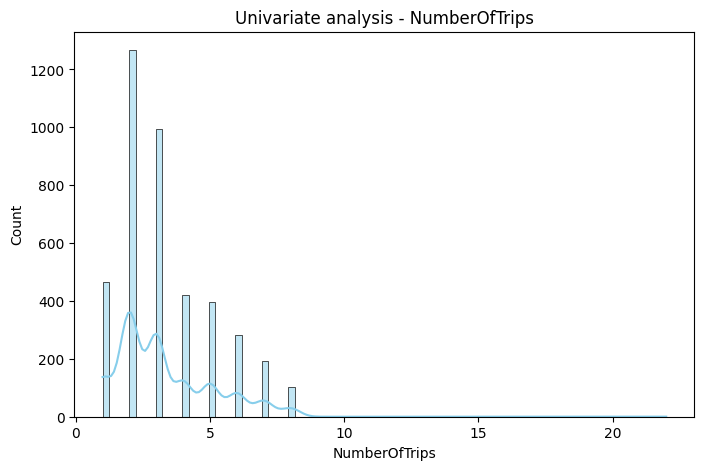

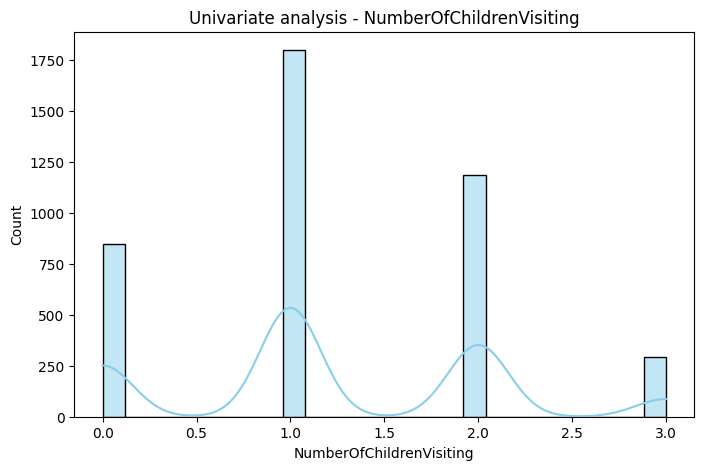

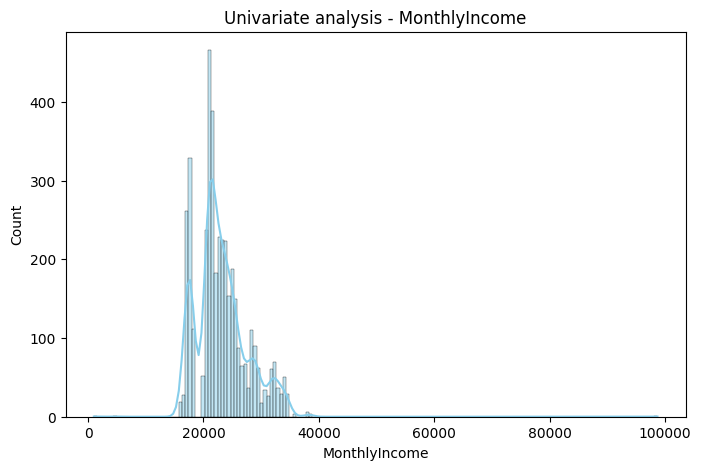

In [19]:
#univariate analysis for numerical column
# we will use histogram to understand the spread of the data


for num_column in nums:
  plt.figure(figsize =  (8,5))
  sns.histplot( df[num_column], kde = True, color = 'skyblue')
  plt.title(f'Univariate analysis - {num_column}')
  plt.show()

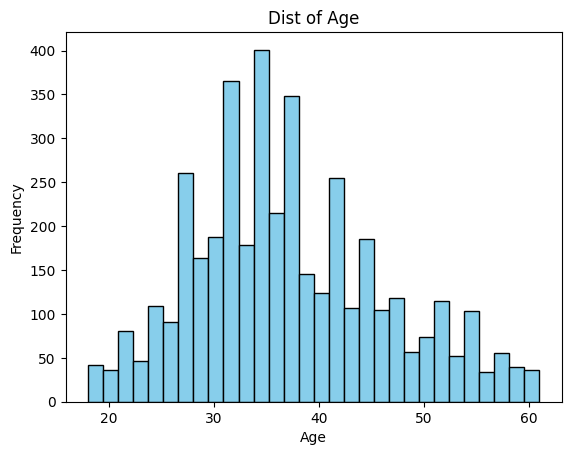

In [21]:
plt.hist(df['Age'].dropna(), bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Dist of Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#insights >> 30-40 age group are travelling more

In [22]:
nums

['CustomerID',
 'Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [24]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [25]:
df.TypeofContact

,TypeofContact
0,Self Enquiry
1,Company Invited
2,Self Enquiry
3,Company Invited
5,Company Invited
...,...
4883,Self Enquiry
4884,Company Invited
4885,Self Enquiry
4886,Self Enquiry


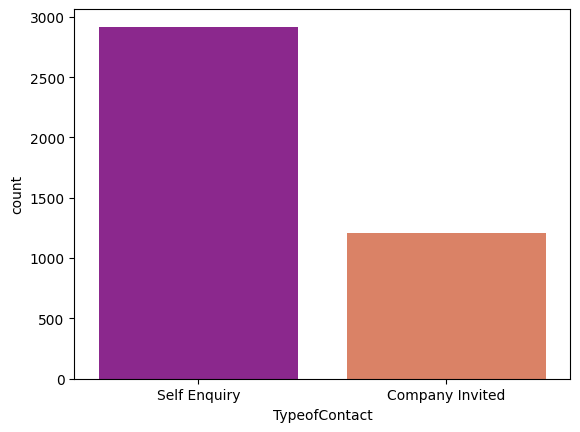

In [26]:
sns.countplot(x = 'TypeofContact', data = df, palette = 'plasma')
plt.show()

In [27]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [28]:
# let us analyis CityTier

df.CityTier.unique()

array([3, 1, 2])

In [30]:
df['CityTier'].describe().T

,CityTier
count,4128.000000
mean,1.663275
std,0.920640
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,3.000000


In [31]:
#Average of 1.66 for CityTier doesn't make any sense

In [33]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.00,22418.0,25301.00,98678.0


In [34]:
df[cats].describe().T


,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [35]:
#All of the columns above are discrete but in terms of business mean values
#of above column doesn't make sense
#So these columns are to be treated as a categorical column
#To treat these columns as categorical column, we will convert them to objet

df[cats] = df[cats].astype('object')

In [36]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615


In [ ]:
#To make sure these columns are treated as categorical
#earlier we had made bifurcation categorical column manually

#sometimes we need to figure it out and figure out this has to be categorical column
#but is numerical column



In [38]:
for i in df[cats]:
  print(f"{i}: {df[i].unique()} and datatype: {df[i].dtypes}\n ")

ProdTaken: [1 0] and datatype: object
 
CityTier: [3 1 2] and datatype: object
 
PreferredPropertyStar: [3.0 4.0 5.0] and datatype: object
 
Passport: [1 0] and datatype: object
 
OwnCar: [1 0] and datatype: object
 
PitchSatisfactionScore: [2 3 5 4 1] and datatype: object
 
TypeofContact: ['Self Enquiry' 'Company Invited'] and datatype: object
 
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business'] and datatype: object
 
Gender: ['Female' 'Male'] and datatype: object
 
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King'] and datatype: object
 
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried'] and datatype: object
 
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP'] and datatype: object
 


In [ ]:
#Bivariate analysis

In [39]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='DurationOfPitch'>

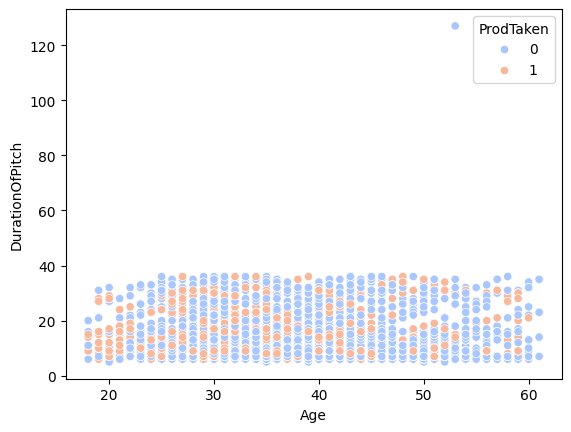

In [40]:
sns.scatterplot(x = 'Age', y = "DurationOfPitch", data=df, hue = 'ProdTaken', palette = 'coolwarm')

In [43]:
#stacked bar chart between marital status and product taken

cross_tab = pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize = 'index') #normalize give percentage

In [44]:
cross_tab

ProdTaken,0,1
MaritalStatus,,
Divorced,0.866920,0.133080
Married,0.857789,0.142211
Single,0.635682,0.364318
Unmarried,0.756598,0.243402


<BarContainer object of 4 artists>

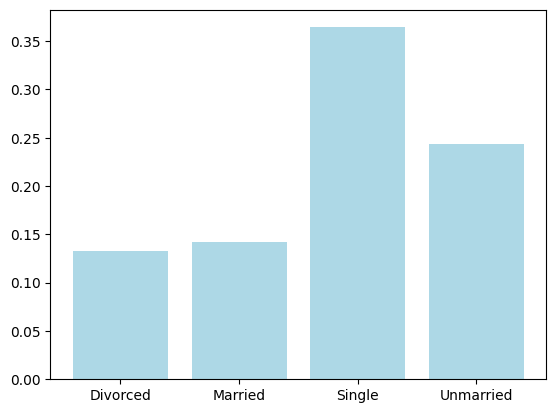

In [46]:
plt.bar(cross_tab.index, cross_tab[1], color = 'lightblue')

<Axes: xlabel='MaritalStatus'>

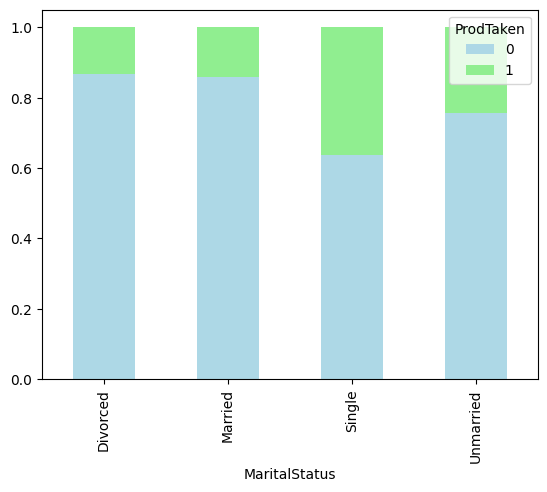

In [47]:
cross_tab.plot(kind = 'bar', stacked = True, color = ['lightblue', 'lightgreen'])

In [ ]:
# Insights - Single people taking more products

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

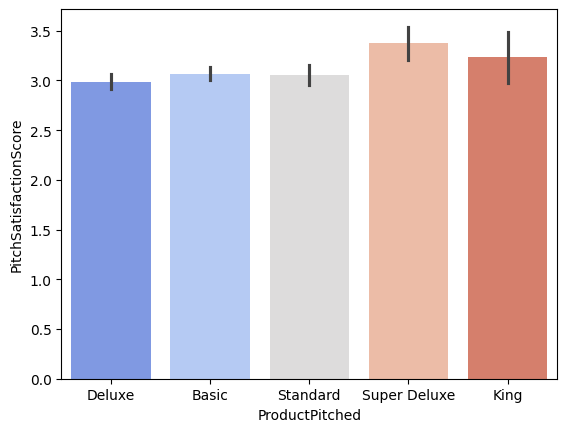

In [48]:
sns.barplot(x = 'ProductPitched', y = 'PitchSatisfactionScore', data=df, palette = 'coolwarm')

In [49]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

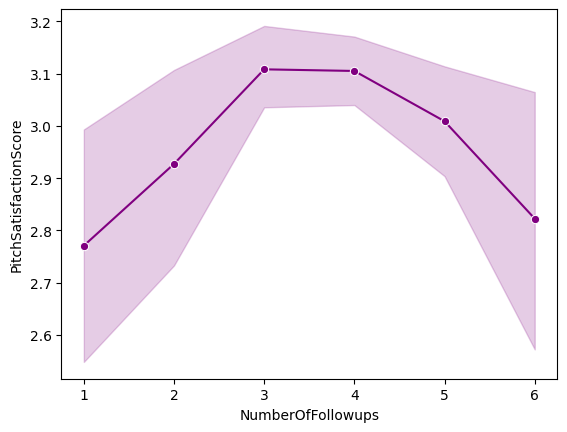

In [51]:
sns.lineplot(x = 'NumberOfFollowups', y = 'PitchSatisfactionScore', data = df, marker = 'o', color = 'purple')

<Axes: xlabel='ProdTaken', ylabel='Age'>

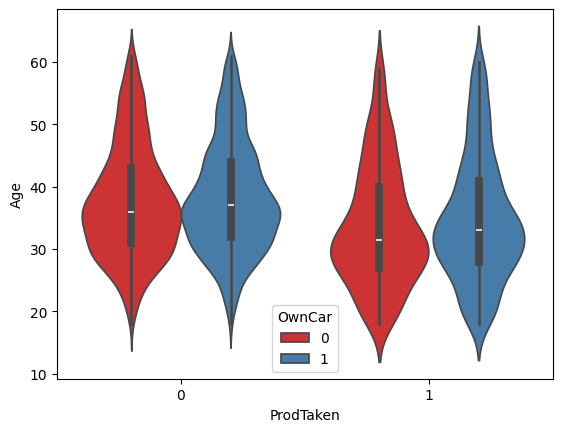

In [52]:
#multivariate analysis
sns.violinplot(x = 'ProdTaken', y = 'Age', data = df, hue = 'OwnCar', palette = 'Set1')

<Axes: xlabel='Gender', ylabel='Age'>

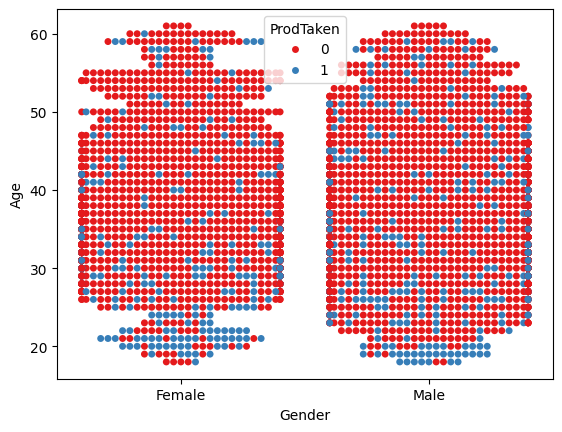

In [53]:
sns.swarmplot(x = 'Gender', y = 'Age', data=df, hue = 'ProdTaken', palette = 'Set1')

<Axes: >

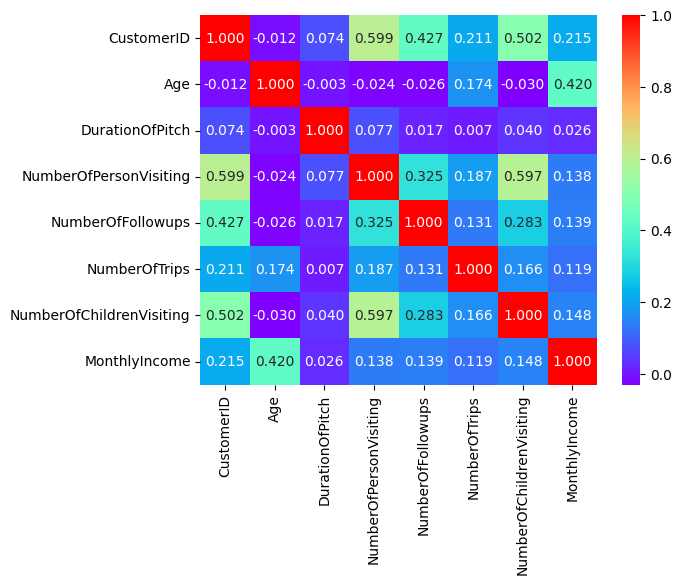

In [60]:
# heatmap

nums_corr = df[nums].corr()
sns.heatmap(nums_corr, annot = True, cmap = 'rainbow', fmt = '.3f')

In [64]:
#Feature Engineering

df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [66]:
df.drop('CustomerID', inplace = True, axis=1)

In [67]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [71]:
#creating new feature

df['TotalVisting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [69]:
df['TotalVisting']


,TotalVisting
0,3.0
1,5.0
2,3.0
3,3.0
5,4.0
...,...
4883,4.0
4884,6.0
4885,7.0
4886,5.0


In [70]:
df


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,5.0


In [72]:
#dropping the older feature

df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis = 1, inplace = True)

In [75]:
# now let us separate numeric features and object features the way we did before


num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Features are: ", len(num_features))

Number of Numerical Features are:  6


In [76]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of categorical Features are: ", len(cat_features))

Number of categorical Features are:  12


In [77]:
#train test split

from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('ProdTaken', axis = 1)
Y = df['ProdTaken']

In [81]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
5,32.0,Company Invited,1,8.0,Salaried,Male,3.0,Basic,3.0,Single,1.0,0,5,1,Executive,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [82]:
Y

,ProdTaken
0,1
1,0
2,1
3,0
5,0
...,...
4883,1
4884,1
4885,1
4886,1


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1 )

In [ ]:
#data is either numerical or categorical, numerical can be either discrete and continous
#discrete data though its numerical but should be treated as categorical to do the analysis
#but for model building all the categorical data should be converted to numbers


In [86]:
# now since we have some categorical data we will do data encoding first

# let divide the data into categorical features and numerical features , i know we did this before
# using for loop but this is the another way


cat_features = X.select_dtypes(include = 'object').columns

Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')

In [91]:
num_features = X.select_dtypes(exclude = 'object').columns

In [92]:
num_features

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'TotalVisting'],
      dtype='object')

In [ ]:
#scaling >> numerical features
#categorical >> Onehot encoding

In [ ]:
# now to do scaling and encoding we have two ways
# first one by one first scaling and then encoding
# second simontanously



In [96]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder # both are data transformer
from sklearn.compose import ColumnTransformer

In [ ]:

#ColumnTransformer applies transformations to columns of an array or pandas datafarme

# This estimator allows different columns or column subsets of the
# input to be transformed separately and the features generated by each
# transformer will be concatenated to form a single feature space.
# This is useful for heterogeneous or columnar data, to combine several
# feature
# extraction mechanisms or transformations into a single transformer.

In [97]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')
preprocessor = ColumnTransformer(
    [
        ('OnHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [98]:
preprocessor

ColumnTransformer(transformers=[('OnHotEncoder', OneHotEncoder(drop='first'),
                                 ['ProdTaken', 'TypeofContact', 'CityTier',
                                  'Occupation', 'Gender', 'ProductPitched',
                                  'PreferredPropertyStar', 'MaritalStatus',
                                  'Passport', 'PitchSatisfactionScore',
                                  'OwnCar', 'Designation']),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'TotalVisting'],
      dtype='object'))])